## Análisis de datos - Clase 2

## Introducción al EDA: medidas estadísticas descriptivas 
<hr style="border:1px solid gray">

In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import describe

#### Funciones auxiliares (helper functions)



In [480]:
# Función para graficar
def plot_histograma(data, column, figsize=(6, 3), bins=15, kde=True, mvd=True, snk=False):
    skewness = (data[column].dropna()).skew()
    kurtosis = (data[column].dropna()).kurt()
    media = (data[column].dropna()).mean()
    var = (data[column].dropna()).var()
    std = (data[column].dropna()).std()
    plt.figure(figsize=figsize)
    plt.grid(axis='y')
    sns.histplot(data[column].dropna(), bins=bins, kde=kde)
    if snk:
        plt.figtext(0.7, 0.8, f'Asimetría: {skewness:.2f}', fontsize=10, color='blue')
        plt.figtext(0.715, 0.73, f'Curtosis: {kurtosis:.2f}', fontsize=10, color='blue')
    plt.axvline(media, color='red', linestyle='--', label='Media')
    if mvd:
        plt.figtext(0.15, 0.8, f'Media: {media:.2f}', fontsize=10, color='red')
        plt.figtext(0.15, 0.73, f'Var: {var:.2f}', fontsize=10, color='red')
        plt.figtext(0.15, 0.66, f'Std: {std:.2f}', fontsize=10, color='red')
    plt.title(f'Variable: {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frecuencia')
    plt.show()
    
    return

#### Datasets que vamos a utilizar (incluidos en la biblioteca Seaborn)
---

#### Descripción del dataset Titanic de Seaborn


| Variable      | Descripción                                                                      |
| ------------- | ---------------------------------------------------------------------------------- |
| `survived`    | 0 = No sobrevivió, 1 = Sobrevivió                                                  |
| `pclass`      | Clase del boleto: 1ª, 2ª o 3ª                                                      |
| `sex`         | Sexo del pasajero (`male`, `female`)                                               |
| `age`         | Edad del pasajero (en años)                                                        |
| `sibsp`       | Número de hermanos o cónyuges a bordo                                              |
| `parch`       | Número de padres o hijos a bordo                                                   |
| `fare`        | Tarifa pagada por el boleto                                                        |
| `embarked`    | Puerto de embarque (`C` = Cherborough, `Q` = Queenstown, `S` = Southampton)          |
| `class`       | Clase del pasajero como string (`First`, `Second`, `Third`) — derivado de `pclass` |
| `who`         | Grupo (`man`, `woman`, `child`) — categorizado a partir de edad y sexo  |
| `adult_male`  | Booleano: ¿Es un hombre adulto?                                                    |
| `deck`        | Letra de la cubierta del camarote (`A` a `G`, o `NaN`)                             |
| `embark_town` | Ciudad de embarque                                               |
| `alive`       | `yes`/`no` según haya sobrevivido                                                  |
| `alone`       | Booleano: ¿Viajaba solo? (`True` si `sibsp + parch == 0`)                          |

#### Descripción del dataset de Pingüinos

| Variable            | Descripción                                              |
| ------------------- | --------------------------------------------------------- |
| `species`           | Especie del pingüino (`Adelie`, `Gentoo`, `Chinstrap`)    |
| `island`            | Isla donde fue observado (`Torgersen`, `Biscoe`, `Dream`) |
| `bill_length_mm`    | Largo del pico (en milímetros)                            |
| `bill_depth_mm`     | Profundidad (alto) del pico (en milímetros)               |
| `flipper_length_mm` | Largo de la aleta (en milímetros)                         |
| `body_mass_g`       | Masa corporal (en gramos)                                 |
| `sex`               | Sexo del pingüino (`male`, `female`)                      |
| `year`              | Año de recolección del dato (`2007`, `2008`, `2009`)      |


#### Importamos los datasets
---


In [481]:
# Cargamos el dataset de Titanic
titanic_df = sns.load_dataset('titanic') # sns.load_dataset Devuelve un Pandas DF

# Cargamos el dataset de pingüinos 
pinguinos_df = sns.load_dataset('penguins') # sns.load_dataset Devuelve un Pandas DF

#### Primera inspección
<hr style="border:1px solid gray">

#### a. Titanic
---

In [482]:
print(f"Dimensiones del dataset original: {titanic_df.shape}")
titanic_df.head()

Dimensiones del dataset original: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [483]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [484]:
# Describimos el dataset
titanic_df.drop(columns=['deck'], inplace=True) # Eliminamos la columna deck que tiene muchos nulos
titanic_df.dropna(inplace=True) # Eliminamos filas con nulos )
print(f"Dimensiones del dataset sin nulos: {titanic_df.shape}")
titanic_df.head()

Dimensiones del dataset sin nulos: (712, 14)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


#### b. Pingüinos
---

In [485]:
print(f"Dimensiones del dataset original: {pinguinos_df.shape}")
pinguinos_df.head()

Dimensiones del dataset original: (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [486]:
pinguinos_df = pinguinos_df.dropna() # Borramos los NaN al igual que en el caso anterior
print(f"Dimensiones del dataset sin nulos: {pinguinos_df.shape}")
pinguinos_df.head()

Dimensiones del dataset sin nulos: (333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


## Análisis de las variables numéricas
<hr style="border:1px solid gray">


#### Histogramas

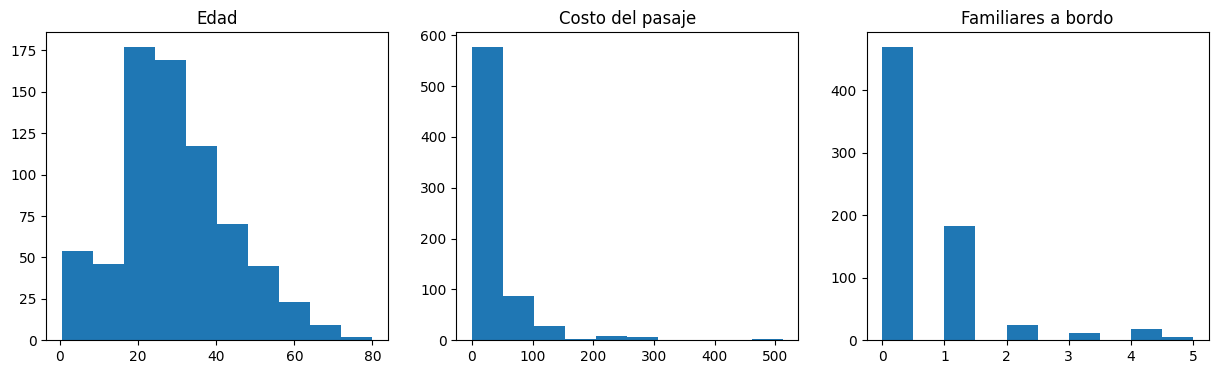

In [487]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].hist(titanic_df['age'])   # edad
ax[0].set_title('Edad')
ax[1].hist(titanic_df['fare'])  # costo del pasaje
ax[1].set_title('Costo del pasaje')
ax[2].hist(titanic_df['sibsp']) # familiares
ax[2].set_title('Familiares a bordo')

plt.show()


#### Variantes del histograma de edad

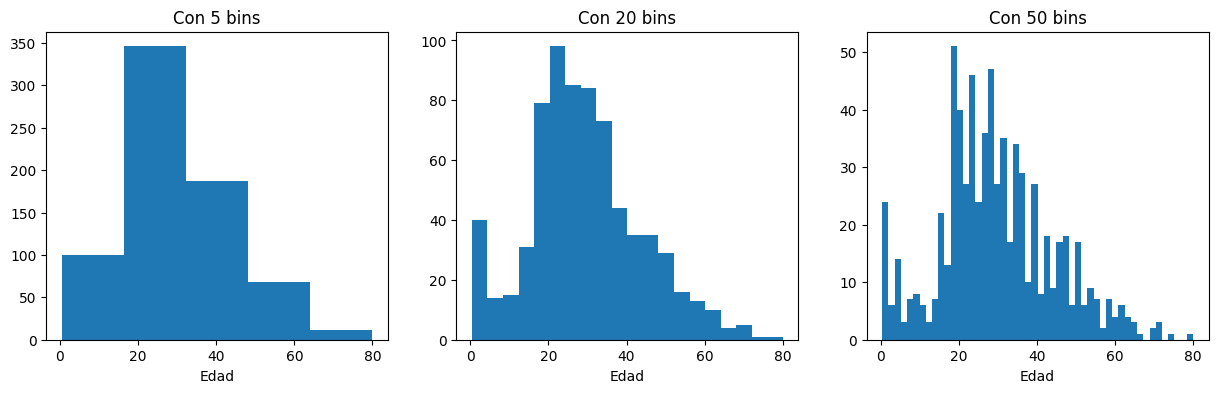

In [488]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].hist(titanic_df['age'], bins=5)
ax[0].set_title('Con 5 bins')
ax[0].set_xlabel('Edad')
ax[1].hist(titanic_df['age'], bins=20)
ax[1].set_title('Con 20 bins')
ax[1].set_xlabel('Edad')
ax[2].hist(titanic_df['age'], bins=50)
ax[2].set_title('Con 50 bins')
ax[2].set_xlabel('Edad')

plt.show()

### 1. Medidas de tendencia central: media, mediana y moda
<hr style="border:1px solid gray">


#### Media

In [489]:
np.mean(titanic_df['age'])    # con NumPy

29.64209269662921

In [490]:
titanic_df['age'].mean()      # con Pandas

29.64209269662921

#### Mediana

In [491]:
np.median(titanic_df['age'])  # con NumPy

28.0

In [492]:
titanic_df['age'].median()    # con Pandas

28.0

#### Moda

In [493]:
titanic_df['age'].mode()[0]                            # con Pandas

24.0

In [494]:
mode_age = st.mode(titanic_df['age'], keepdims=False)  # con SciPy
mode_age.mode

24.0

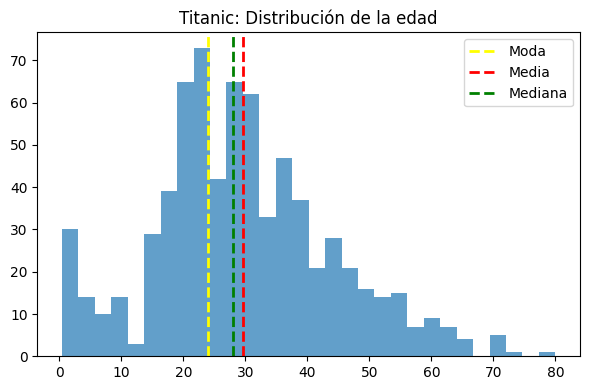

In [495]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(titanic_df['age'], bins=30, alpha=0.7) # dibujar histograma
ax.axvline(titanic_df['age'].mode()[0], color='yellow', ls='--', lw=2, label='Moda')
ax.axvline(titanic_df['age'].mean(), color='red', ls='--', lw=2, label='Media')
ax.axvline(titanic_df['age'].median(), color='green', ls='--', lw=2, label='Mediana')
ax.set_title('Titanic: Distribución de la edad')
ax.legend()

plt.tight_layout()
plt.show()

#### Comparamos la distribución de las tres variables: edad, costo del pasaje y número de familiares

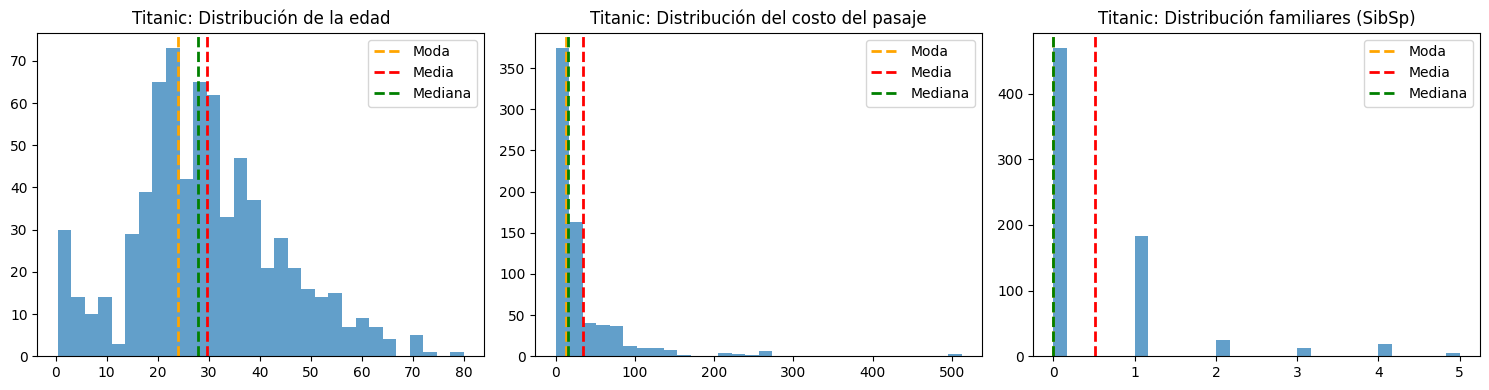

In [496]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Función para graficar
def plot_distribution(ax, data, title):
    ax.hist(data, bins=30, alpha=0.7) # dibujar histograma
    ax.axvline(data.mode()[0], color='orange', linestyle='dashed', linewidth=2, label='Moda') # dibujar la moda
    ax.axvline(data.mean(), color='red', linestyle='dashed', linewidth=2, label='Media') # dibujar la media
    ax.axvline(data.median(), color='green', linestyle='dashed', linewidth=2, label='Mediana') # dibujar la mediana
    ax.set_title(title)
    ax.legend()

plot_distribution(axes[0], titanic_df['age'], 'Titanic: Distribución de la edad')
plot_distribution(axes[1], titanic_df['fare'], 'Titanic: Distribución del costo del pasaje')
plot_distribution(axes[2], titanic_df['sibsp'], 'Titanic: Distribución familiares (SibSp)')

plt.tight_layout()
plt.show()

#### ¿Qué métrica representa mejor cada variable (edad, costo, familiares)?

### 2. Medidas de dispersión: varianza y desviación estándar
<hr style="border:1px solid gray">


In [497]:
# Renombramos las columnas
pinguinos_df.columns = ['especie', 'isla', 'largo_pico', 'ancho_pico', 'largo_aleta', 'masa_corporal', 'sexo']    

In [498]:
# Calculamos la media, varianza y desviación estándar del largo de las aletas
media = pinguinos_df['largo_aleta'].mean()
var = pinguinos_df['largo_aleta'].var()
std_dev = pinguinos_df['largo_aleta'].std()
print(f'La media del largo de las aletas es {media:.2f} mm., \nla varianza es {var:.4f} mm. y \nla desviación estándar es {std_dev:.4f} mm.')

La media del largo de las aletas es 200.97 mm., 
la varianza es 196.4417 mm. y 
la desviación estándar es 14.0158 mm.


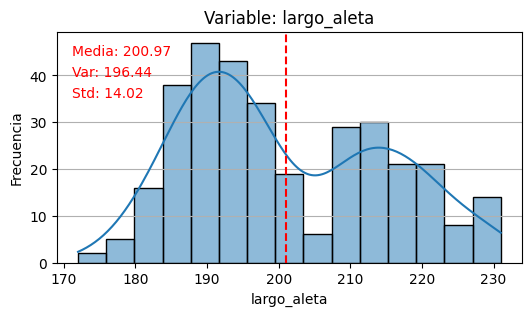

In [499]:
# Usamos la función que definimos para graficar (ver sección HELPER FUNCTIONS)
plot_histograma(pinguinos_df, 'largo_aleta')

#### KDE: Kernel Density Estimation --> estimar la función de densidad de probabilidad (PDF)

<Axes: xlabel='largo_aleta', ylabel='Density'>

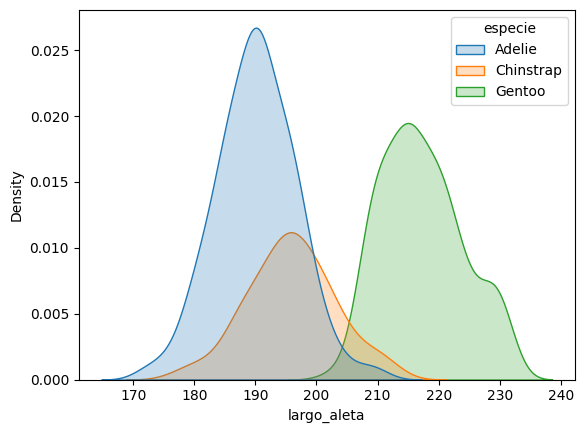

In [500]:

sns.kdeplot(data=pinguinos_df, x='largo_aleta', hue='especie', fill=True)

### 3. Cuantiles y rango intercuartil
<hr style="border:1px solid gray">


In [501]:
Q1 = pinguinos_df['largo_aleta'].quantile(0.25)
Q2 = pinguinos_df['largo_aleta'].quantile(0.50)  # Percentile 5-0 - Equivalente a la mediana
Q3 = pinguinos_df['largo_aleta'].quantile(0.75)

print("Q1 (25%):", Q1)
print("Q2 (Mediana, 50%):", Q2)
print("Q3 (75%):", Q3)

Q1 (25%): 190.0
Q2 (Mediana, 50%): 197.0
Q3 (75%): 213.0


In [502]:
IQR = Q3 - Q1
print("Rango intercuartil (IQR):", IQR)

Rango intercuartil (IQR): 23.0


#### Visualizamos estas variables con Boxplots

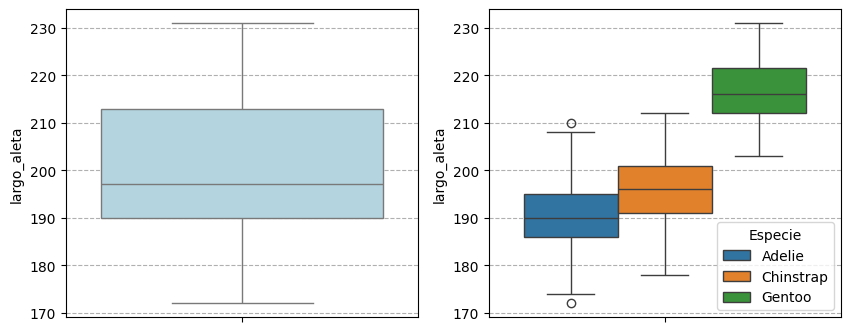

In [503]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=pinguinos_df, y='largo_aleta', color="lightblue", ax=ax[0])
sns.boxplot(data=pinguinos_df, y='largo_aleta', hue='especie', ax=ax[1])         # con seaborn-0.13.2

ax[0].grid(axis='y', ls='--')
ax[1].grid(axis='y', ls='--')
plt.legend(title='Especie', loc='lower right')


plt.show()

#### Violinplot: cuando necesito comparar distribuciones entre grupos, identificar distribuciones complejas, etc.

<Axes: xlabel='largo_aleta', ylabel='especie'>

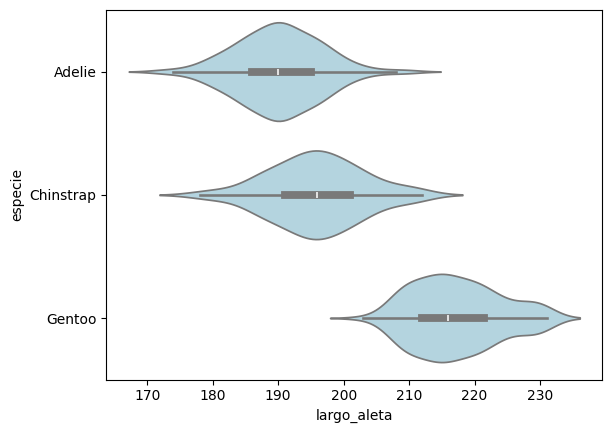

In [504]:
sns.violinplot(data=pinguinos_df, x='largo_aleta', y='especie', color="lightblue", inner="box")

<Axes: xlabel='largo_aleta', ylabel='especie'>

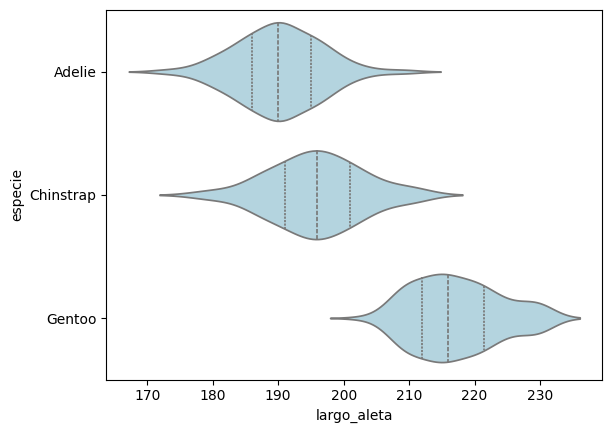

In [505]:
sns.violinplot(data=pinguinos_df, x='largo_aleta', y='especie', color="lightblue", inner="quartile")

Obs: la variable "especie" es muy importante dentro de este dataset, porque explica una gran parte de la variación de los otros features.

### 4. Medidas de forma: skewness (asimetría) y curtosis
<hr style="border:1px solid gray">


In [506]:
# Con Pandas
print(f"Asímetría de la variable masa_corporal: {pinguinos_df['masa_corporal'].skew()}")
print(f"Curtosis de la variable masa_corporal: {pinguinos_df['masa_corporal'].kurtosis()}")

Asímetría de la variable masa_corporal: 0.4722460732964026
Curtosis de la variable masa_corporal: -0.7334889525794943


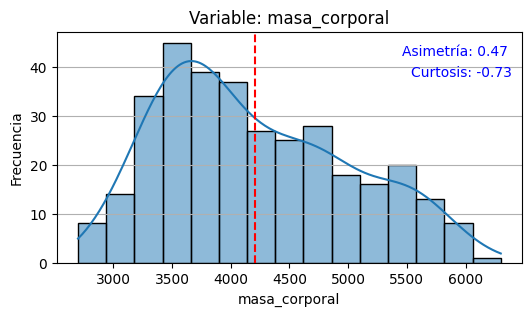

In [507]:
plot_histograma(pinguinos_df, 'masa_corporal',mvd= False, snk=True)

#### ¿Por qué decimos que la asímetría y la curtosis tienen más sentido en las distibuciones unimodales y continuas?

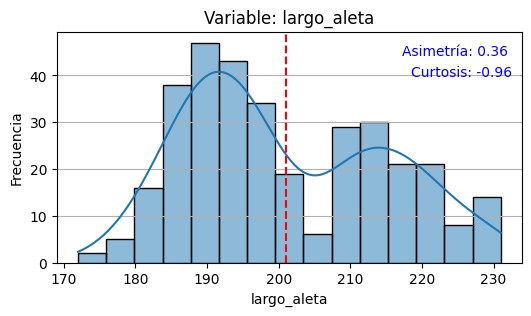

In [508]:
plot_histograma(pinguinos_df, 'largo_aleta',mvd= False, snk=True)

En el caso del largo de la aleta de los pingũinos, la distribución es bimodal y la curtosis y la asimetría ya no son tan fáciles de interpretar.

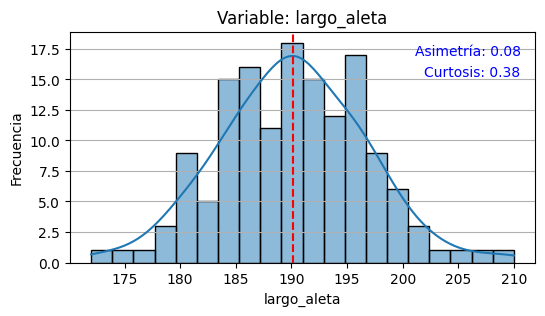

In [509]:
#¿Qué pasa si analizamos por especie?
adelie = pinguinos_df[pinguinos_df['especie'] == 'Adelie']
plot_histograma(adelie, 'largo_aleta',mvd= False, snk=True, bins=20)

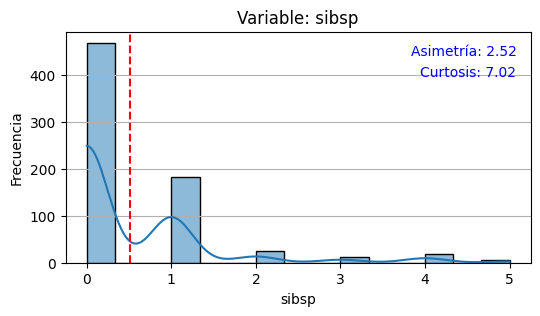

In [510]:
plot_histograma(titanic_df, 'sibsp', mvd= False, snk=True)

En el caso de las variables discretas, no se tiene un histograma "suave" (se visualizan escalones) y es difícil de interpretar la asimetría y la curtosis.

#### QQPlot

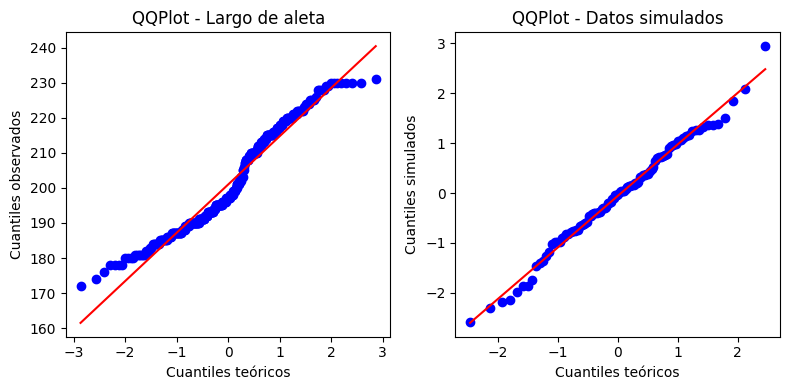

In [511]:
fig, (ax_ping, ax_normal) = plt.subplots(1, 2, figsize=(8, 4))

# QQPlot para largo de aleta de pingüinos
st.probplot(pinguinos_df['largo_aleta'], dist="norm", plot=ax_ping)
ax_ping.set_title("QQPlot - Largo de aleta")
ax_ping.set_xlabel("Cuantiles teóricos")
ax_ping.set_ylabel("Cuantiles observados")

# QQPlot para datos aleatorios con distribución normal
data = np.random.normal(loc=0, scale=1, size=100)
st.probplot(data, dist="norm", plot=ax_normal)
ax_normal.set_title("QQPlot - Datos simulados")
ax_normal.set_xlabel("Cuantiles teóricos")
ax_normal.set_ylabel("Cuantiles simulados")

plt.tight_layout()
plt.show()


### 5. Estadística descriptiva completa
<hr style="border:1px solid gray">


In [512]:
print("Estadística descriptiva del dataset Titanic:\n", titanic_df.describe())

Estadística descriptiva del dataset Titanic:
          survived      pclass         age       sibsp       parch        fare
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000
mean     0.404494    2.240169   29.642093    0.514045    0.432584   34.567251
std      0.491139    0.836854   14.492933    0.930692    0.854181   52.938648
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   20.000000    0.000000    0.000000    8.050000
50%      0.000000    2.000000   28.000000    0.000000    0.000000   15.645850
75%      1.000000    3.000000   38.000000    1.000000    1.000000   33.000000
max      1.000000    3.000000   80.000000    5.000000    6.000000  512.329200


In [513]:
# estadística básica + percentiles
titanic_df.describe(percentiles=[.1,.9,.95])

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,0.000000,1.000000,14.000000,0.000000,0.000000,7.750000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
90%,1.000000,3.000000,50.000000,1.000000,2.000000,79.200000
95%,1.000000,3.000000,56.000000,2.000000,2.000000,120.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


#### Con Scipy (incluye skewness y kurtosis)

In [514]:
# Scipy scipy.stats.describe devuelve un objeto con estadísticas descriptivas
ed_titanic = st.describe(titanic_df[['age', 'fare', 'sibsp']].dropna())

ed_titanic_df = pd.DataFrame({  
    'Observaciones': ed_titanic.nobs,
    'Min': ed_titanic.minmax[0],
    'Max': ed_titanic.minmax[1],
    'Media': ed_titanic.mean,
    'Varianza': ed_titanic.variance,
    'Asimetría': ed_titanic.skewness,
    'Curtosis': ed_titanic.kurtosis}, index=titanic_df[['age', 'fare', 'sibsp']].columns)

ed_titanic_df.head()


,Observaciones,Min,Max,Media,Varianza,Asimetría,Curtosis
age,712,0.42,80.0000,29.642093,210.045104,0.388061,0.178216
fare,712,0.00,512.3292,34.567251,2802.500471,4.657171,30.787599
sibsp,712,0.00,5.0000,0.514045,0.866188,2.509806,6.960581


## Análisis de las variables categóricas
<hr style="border:1px solid gray">

#### a. Exploramos las variables categóricas del dataset del Titanic

In [515]:
# Convertimos columnas del dataset del Titanic al tipo correcto
titanic_df['survived'] = titanic_df['survived'].astype('category')
titanic_df['sex'] = titanic_df['sex'].astype('category')
titanic_df['class'] = titanic_df['class'].astype('category')
titanic_df['embark_town'] = titanic_df['embark_town'].astype('category')

In [516]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    category
 1   pclass       712 non-null    int64   
 2   sex          712 non-null    category
 3   age          712 non-null    float64 
 4   sibsp        712 non-null    int64   
 5   parch        712 non-null    int64   
 6   fare         712 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        712 non-null    category
 9   who          712 non-null    object  
 10  adult_male   712 non-null    bool    
 11  embark_town  712 non-null    category
 12  alive        712 non-null    object  
 13  alone        712 non-null    bool    
dtypes: bool(2), category(4), float64(2), int64(3), object(3)
memory usage: 54.7+ KB


In [517]:
titanic_df.describe(include='category')

# count = cant. de datos no nulos
# unique = cantidad de categorias distintas
# top = categoria con mayor frecuencia
# freq = frecuencia de la categoria top

,survived,sex,class,embark_town
count,712,712,712,712
unique,2,2,3,3
top,0,male,Third,Southampton
freq,424,453,355,554


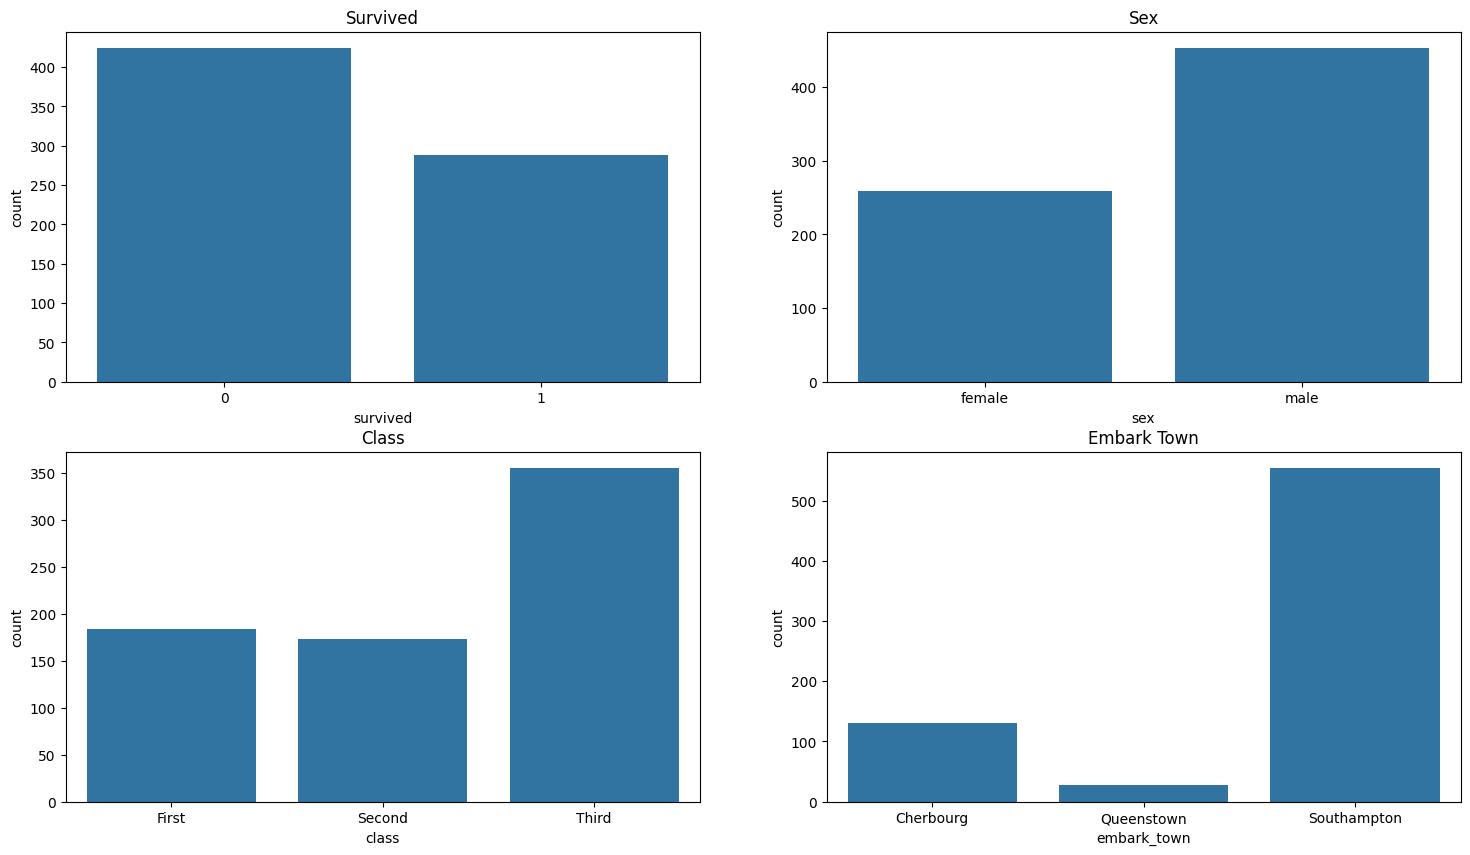

In [518]:
# Crear cada cajita
fig, ax = plt.subplots(2, 2, figsize=(18, 10))

# Gráficos de barras de cada una
sns.countplot(x='survived', data=titanic_df, ax=ax[0,0])
sns.countplot(x='sex', data=titanic_df, ax=ax[0,1])
sns.countplot(x='class', data=titanic_df, ax=ax[1,0])
sns.countplot(x='embark_town', data=titanic_df, ax=ax[1,1])

# Títulos
ax[0,0].set_title('Survived')
ax[0,1].set_title('Sex')
ax[1,0].set_title('Class')
ax[1,1].set_title('Embark Town')

plt.show()

#### Visualizamos relaciones entre variables

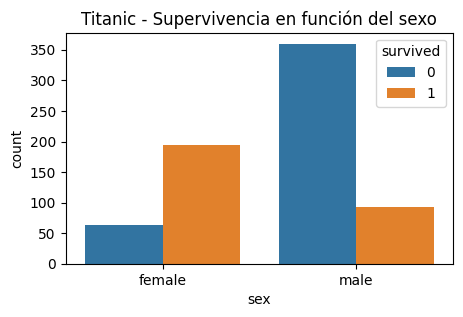

In [519]:
# Cuántas personas sobrevivieron de cada sexo?
plt.figure(figsize=(5, 3))
sns.countplot(x='sex', hue='survived', data=titanic_df)
plt.title("Titanic - Supervivencia en función del sexo")
plt.show()

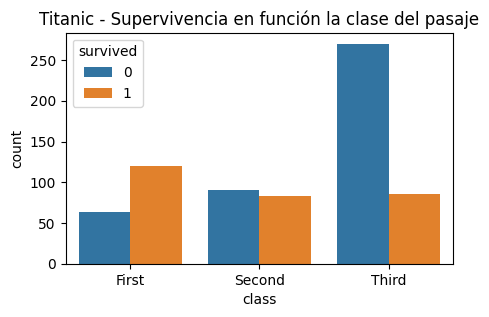

In [520]:
# Cómo se relaciona la supervivencia con la clase del pasaje?
plt.figure(figsize=(5, 3))
sns.countplot(x='class', hue='survived', data=titanic_df)
plt.title("Titanic - Supervivencia en función la clase del pasaje")
plt.show()

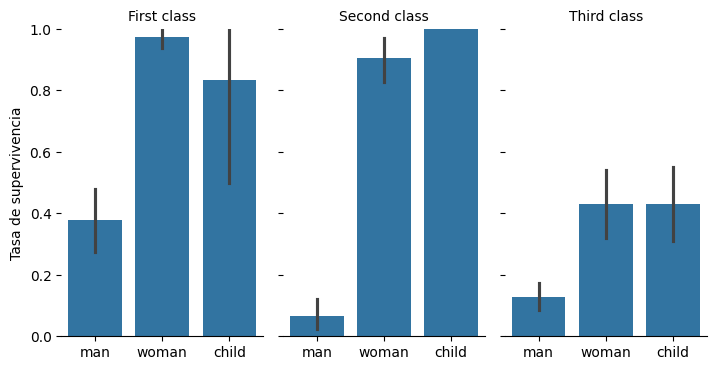

In [521]:
grafico = sns.catplot(data=titanic_df, x="who", y="survived", col="class", kind="bar", height=4, aspect=.6)
grafico.set_axis_labels("", "Tasa de supervivencia")
grafico.set_titles("{col_name} {col_var}")
grafico.set(ylim=(0, 1))
grafico.despine(left=True) # Saca el borde del eje izquierdo

In [522]:
# ¿Por qué los intervalos de confianza para los niños son más amplios?
titanic_df[(titanic_df['class'] == 'First') & (titanic_df['who'] == 'child')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
297,0,1,female,2.00,1,2,151.5500,S,First,child,False,Southampton,no,False
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,Southampton,yes,False
435,1,1,female,14.00,1,2,120.0000,S,First,child,False,Southampton,yes,False
445,1,1,male,4.00,0,2,81.8583,S,First,child,False,Southampton,yes,False
689,1,1,female,15.00,0,1,211.3375,S,First,child,False,Southampton,yes,False
802,1,1,male,11.00,1,2,120.0000,S,First,child,False,Southampton,yes,False


Obs: 
* Seaborn calcula la tasa de supervivencia analizando la cantidad de 1s (sobrevivió) sobre el total de pasajeros de cada grupo por clase. Es decir, la altura de cada barra es la media.
* Las líneas verticales indican el intervalo de confianza del 95% (este es el valor por defecto) para ese cálculo.

#### b. Exploramos las variables categóricas del dataset de Pingüinos (Otros gráficos)

In [523]:
# Convertimos columnas del dataset del Titanic al tipo correcto
pinguinos_df['sexo'] = pinguinos_df['sexo'].astype('category')
pinguinos_df['especie'] = pinguinos_df['especie'].astype('category')
pinguinos_df['isla'] = pinguinos_df['isla'].astype('category')

In [524]:
pinguinos_df.describe(include='category')

,especie,isla,sexo
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


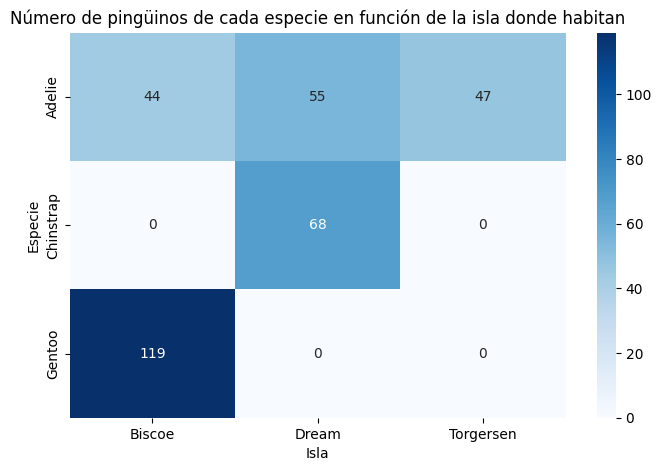

In [525]:
plt.figure(figsize=(8, 5))
cross_tab = pd.crosstab(pinguinos_df['especie'], pinguinos_df['isla'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Número de pingüinos de cada especie en función de la isla donde habitan')
plt.xlabel('Isla')
plt.ylabel('Especie')
plt.show()

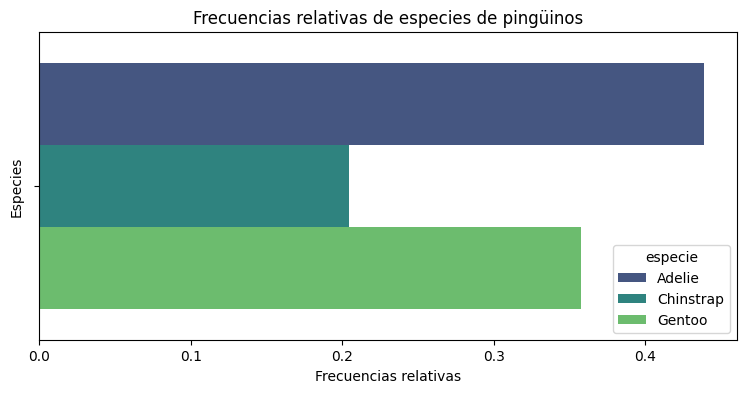

In [526]:
# Calcular frecuencias relativas
total = len(pinguinos_df)
relative_freq = pinguinos_df['especie'].value_counts() / total

# Graficar frecuencias relativas
plt.figure(figsize=(9, 4))
sns.barplot(x=relative_freq.values, hue=relative_freq.index, palette='viridis')
plt.title('Frecuencias relativas de especies de pingüinos')
plt.xlabel('Frecuencias relativas')
plt.ylabel('Especies')
plt.show()

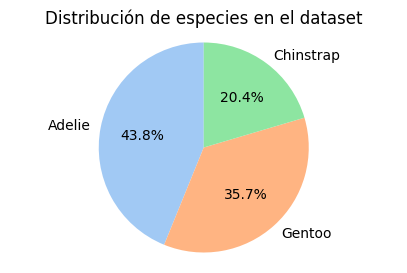

In [527]:
# Calcular cantidades de cada especie
especies_counts = pinguinos_df['especie'].value_counts()

# Crear el gráfico de torta o pie chart
plt.figure(figsize=(5, 3))
plt.pie(especies_counts, labels=especies_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución de especies en el dataset')
plt.axis('equal')  # "Equal" se usa para asegurar que el pie chart es circular
plt.show()